<a href="https://colab.research.google.com/github/Leoli04/llms-notebooks/blob/main/d2l/03_d2l_multilayer_perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多层感知机

 最简单的深度网络称为多层感知机。多层感知机由多层神经元组成， 每一层与它的上一层相连，从中接收输入； 同时每一层也与它的下一层相连，影响当前层的神经元。





## 多层感知机

多层感知机由以下几个部分组成：

1.  **输入层（Input Layer）：**

  - 接受来自外部的数据输入。输入层的每个节点（神经元）代表一个输入特征。

2.  **隐藏层（Hidden Layer）：**

  - 位于输入层和输出层之间，负责对输入数据进行非线性变换。隐藏层可以有一个或多个，每层包含若干神经元。每个隐藏层神经元接收前一层所有神经元的输出，并通过激活函数（Activation Function）进行处理。
3.  输出层（Output Layer）：

### 隐藏层

上一节主要聊的是线性神经网络， 例如，如果我们试图预测一个人是否会偿还贷款。 我们可以认为，在其他条件不变的情况下， 收入较高的申请人比收入较低的申请人更有可能偿还贷款。 但是，虽然收入与还款概率存在单调性，但它们不是线性相关的。 收入从0增加到5万，可能比从100万增加到105万带来更大的还款可能性。 处理这一问题的一种方法是对我们的数据进行预处理， 使线性变得更合理，如使用收入的对数作为我们的特征。

然而我们可以很容易找出违反单调性的例子。 例如，我们想要根据体温预测死亡率。 对体温高于37摄氏度的人来说，温度越高风险越大。 然而，对体温低于37摄氏度的人来说，温度越高风险就越低。 在这种情况下，我们也可以通过一些巧妙的预处理来解决问题。 例如，我们可以使用与37摄氏度的距离作为特征。

我们可以通过在网络中加入一个或多个隐藏层来克服线性模型的限制， 使其能处理更普遍的函数关系类型。


**通过多个隐藏层的逐层处理，模型能够从原始输入中提取和抽象出多层次的特征，从而具备强大的表达能力和泛化能力。隐藏层数量和每层神经元数量的选择是设计MLP时的重要考虑因素，会直接影响模型的性能和计算复杂度。**

### 激活函数

激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活， 它们将输入信号转换为输出的可微运算。 大多数激活函数都是非线性的。

In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

#### ReLU函数

修正线性单元（Rectified linear unit，ReLU）， 实现简单，同时在各种预测任务中表现良好。

$$\operatorname{ReLU}(x) = \max(x, 0).$$

即将输入中的负值部分设为0，正值部分保持不变。

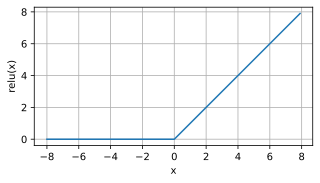

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

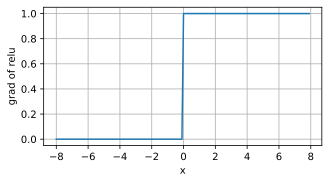

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### sigmoid函数

[**对于一个定义域在$\mathbb{R}$中的输入，
*sigmoid函数*将输入变换为区间(0, 1)上的输出**]。
因此，sigmoid通常称为*挤压函数*（squashing function）：
它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}$$**

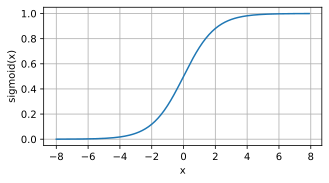

In [ ]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

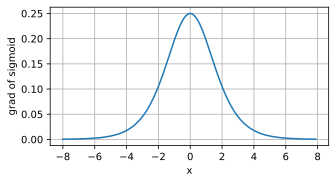

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### tanh函数

与sigmoid函数类似，
[**tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上**]。
tanh函数的公式如下：

**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**

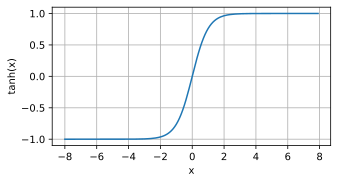

In [ ]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

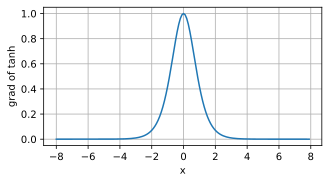

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

## 多层感知机的实现

介绍通过高级API更简洁地实现多层感知机。

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 模型
net = nn.Sequential(nn.Flatten(),
          nn.Linear(784, 256),
          nn.ReLU(),
          nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 小结

  - 输出最终的预测结果。输出层的神经元数量与任务的输出需求一致，例如分类任务中，输出层的神经元数量等于类别数。


- 多层感知机在输出层和输入层之间增加一个或多个全连接隐藏层，并通过激活函数转换隐藏层的输出。

- 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

- 超参数为隐藏层数，和各个隐藏层大小

## 模型选择、欠拟合和过拟合

机器学习的目标是发现某些模式， 这些模式捕捉到了我们训练集潜在总体的规律。 如果成功做到了这点，即使是对以前从未遇到过的个体， 模型也可以成功地评估风险。 如何发现可以泛化的模式是机器学习的根本问题。

将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合（overfitting）， 用于对抗过拟合的技术称为正则化（regularization）。


### 训练误差和泛化误差

- 训练误差（training error）是指， 模型在训练数据集上计算得到的误差。
泛化误差（generalization error）是指， 模型在新数据上的误差

#### 模型复杂性

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。 当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。


我们将重点介绍几个倾向于影响模型泛化的因素。

1. **可调整参数的数量。**当可调整参数的数量（有时称为*自由度*）很大时，模型往往更容易过拟合。
1. **参数采用的值。**当权重的取值范围较大时，模型可能更容易过拟合。
1. **训练样本的数量**。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 模型选择

在机器学习中，我们通常在评估几个候选模型后选择最终的模型。 这个过程叫做模型选择。

#### 验证集

- 验证数据集（validation dataset）:一个用来评估模型好坏的数据集
- 测试数据集:只用一次的数据集。

####  $K$折交叉验证

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。
这个问题的一个流行的解决方案是采用$K$*折交叉验证*。


将原始训练数据被分成$K$个不重叠的子集。
然后执行$K$次模型训练和验证，每次在$K-1$个子集上进行训练，
并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。
最后，通过对$K$次实验的结果取平均来估计训练和验证误差。

### 欠拟合还是过拟合？

 - 如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足）， 无法捕获试图学习的模式。  这种现象被称为欠拟合（underfitting）。

 - 当我们的训练误差明显低于验证误差时要小心， 这表明严重的过拟合（overfitting）。

 训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。 随着训练数据量的增加，泛化误差通常会减小。

### 多项式回归

通过多项式拟合来探索这些概念。

In [ ]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

# 生成数据集

max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

# 对模型进行训练和测试

def evaluate_loss(net, data_iter, loss):
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())


In [ ]:
# 正常拟合
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

In [ ]:
# 欠拟合

# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

# 过拟合
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

### 小结

- 训练数据集:训练模型参数
- 验证数据集:选择模型超参数
- 非大数据集上通常使用 k-折交叉验证

- 模型容量需要匹配数据复杂度，否则可能导致欠拟合和过
拟合

- 欠拟合是指模型无法继续减少训练误差。过拟合是指训练误差远小于验证误差。机器学习模型需要注意防止过拟合，即防止泛化误差过大。

## 权重衰减

权重衰减（Weight Decay），也称为L2正则化，是一种用于防止机器学习模型过拟合的技术。其原理是在损失函数中添加一个关于模型权重的惩罚项，从而限制模型参数的过大变化，使得模型更加简单、泛化能力更强。

原理：
假设我们有一个损失函数$L(\mathbf{w}, b)$，其中 $\mathbf{w}$ 是模型的权重向量。在权重衰减中，我们修改损失函数，添加一个权重的二范数（L2范数）作为惩罚项。新的损失函数形式如下：

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2$$

其中：

$\lambda$ 是正则化系数，控制权重衰减的强度。

$\|\mathbf{w}\|^2$:表示权重向量的二范数的平方，即所有权重的平方和。

### 小结

- 权重衰退通过L2 正则项使得模型参数不会过大，从而控制模型复杂度
- 正则项权重是控制模型复杂度的超参数
- 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。

- 保持模型简单的一个特别的选择是使用
惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。

In [ ]:
# 在PyTorch中，权重衰减可以通过在优化器中设置 weight_decay 参数来实现。
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

## 暂退法（Dropout）（丢弃法）

暂退法（Dropout）也叫丢弃法，是一种防止神经网络过拟合的技术。通过在训练过程中随机地忽略（即“暂退”）一部分神经元，可以使网络更加鲁棒，减少过拟合，提高泛化能力。

暂退法的实现步骤
- 在每个训练步骤中，随机选择一些神经元，将它们的输出设置为零。
- 其他神经元继续正常工作，参与前向传播和反向传播。
- 在每个训练步骤中，选择的神经元都是随机的。
- 在测试过程中，不使用暂退法，而是使用所有的神经元，并将它们的输出缩放（通常按暂退概率进行缩放），以近似地模拟训练过程中每个神经元的期望输出。

### 动手实现

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

# 暂退法函数
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    # 比较随机张量与 Dropout 概率 p，生成一个布尔掩码，其中元素为 True（值为1）表示保留该神经元，
    # 为 False（值为0）表示忽略该神经元。
    mask = (torch.rand(X.shape) > dropout).float()
    # mask * X 将输入张量 X 与掩码相乘，忽略部分神经元的输出。
    # 1/ (1.0 - dropout)对剩下的神经元输出进行缩放，以保持输出的期望值不变。
    return mask * X / (1.0 - dropout)

# 模型参数
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

dropout1, dropout2 = 0.2, 0.5

# 模型
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

# 训练与测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 框架实现

对于深度学习框架的高级API，我们只需在每个全连接层之后添加一个Dropout层， 将暂退概率作为唯一的参数传递给它的构造函数。 在训练时，Dropout层将根据指定的暂退概率随机丢弃上一层的输出（相当于下一层的输入）。 在测试时，Dropout层仅传递数据。

In [ ]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 小结

- 丢弃法将一些输出项随机置0来控制模型复杂度
- 常作用在多层感知机的隐藏层输出上
- 丢弃概率是控制模型复杂度的超参数
- 暂退法仅在训练期间使用。

## 前向传播、反向传播和计算图

- 前向传播在神经网络定义的计算图中按顺序计算和存储中间变量，它的顺序是从输入层到输出层。
- 反向传播按相反的顺序（从输出层到输入层）计算和存储神经网络的中间变量和参数的梯度。
- 在训练深度学习模型时，前向传播和反向传播是相互依赖的。。 对于前向传播，我们沿着依赖的方向遍历计算图并计算其路径上的所有变量。 然后将这些用于反向传播，其中计算顺序与计算图的相反。
- 训练比预测需要更多的内存：前向传播需要保留中间值，直到反向传播完成。

## 数值稳定性和模型初始化

数值稳定性的常见两个问题：

- 梯度爆炸的问题
  - 值超出值域(infinity)：
    - 对于 16位浮点数尤为严重(数值区间 6e-5-6e4)
  - 对学习率敏感：
    - 如果学习率太大 ->大参数值 ->更大的梯度
    - 如果学习率太小->训练无进展
    - 我们可能需要在训练过程不断调整学习率

- 梯度消失的问题
  - 梯度值变成 0：对 16 位浮点数尤为严重
  - 训练没有进展：不管如何选择学习率
  - 对于底部层尤为严重：
    - 仅仅顶部层训练的较好

    - 无法让神经网络更深


  


### 让训练更加稳定

- 目标:让梯度值在合理的范围内，例如[le-6,le3

- 将乘法变加法：ResNet,LSTM
- 归一化：梯度归一化，梯度裁剪
- 合理的权重初始和激活函数


## 环境和分布偏移

在许多情况下，训练集和测试集并不来自同一个分布。这就是所谓的**分布偏移。**



### 分布偏移的类型

- 协变量偏移
- 标签偏移
- 概念偏移:当标签的定义发生变化时，就会出现这种问题。